In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

### Reading DataSet

In [3]:
df = pd.read_excel('HR_Employee_Attrition Dataset.xlsx')

In [4]:
df.head()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [5]:
df.shape

(2940, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
EmployeeNumber              2940 non-null int64
Attrition                   2940 non-null object
Age                         2940 non-null int64
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome               2940 non-null int64
MonthlyRate           

### Attrition is around 16% 

In [7]:
df.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

### Inspecting for Nulls

In [8]:
df.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [9]:
df.JobInvolvement.value_counts()

3    1736
2     750
4     288
1     166
Name: JobInvolvement, dtype: int64

In [10]:
df.describe().transpose()

count          mean          std     min      25%  \
EmployeeNumber            2940.0   1470.500000   848.849221     1.0   735.75   
Age                       2940.0     36.923810     9.133819    18.0    30.00   
DailyRate                 2940.0    802.485714   403.440447   102.0   465.00   
DistanceFromHome          2940.0      9.192517     8.105485     1.0     2.00   
Education                 2940.0      2.912925     1.023991     1.0     2.00   
EnvironmentSatisfaction   2940.0      2.721769     1.092896     1.0     2.00   
HourlyRate                2940.0     65.891156    20.325969    30.0    48.00   
JobInvolvement            2940.0      2.729932     0.711440     1.0     2.00   
JobLevel                  2940.0      2.063946     1.106752     1.0     1.00   
JobSatisfaction           2940.0      2.728571     1.102658     1.0     2.00   
MonthlyIncome             2940.0   6502.931293  4707.155770  1009.0  2911.00   
MonthlyRate               2940.0  14313.103401  7116.575021  2094.0  8045.00   
NumCompaniesWorked        2940.0      2.693197     2.497584     0.0     1.00   
PercentSalaryHike         2940.0     15.209524     3.659315    11.0    12.00   
PerformanceRating         2940.0      3.153741     0.360762     3.0     3.00   
RelationshipSatisfaction  2940.0      2.712245     1.081025     1.0     2.00   
StandardHours             2940.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          2940.0      0.793878     0.851932     0.0     0.00   
TotalWorkingYears         2940.0     11.279592     7.779458     0.0     6.00   
TrainingTimesLastYear     2940.0      2.799320     1.289051     0.0     2.00   
WorkLifeBalance           2940.0      2.761224     0.706356     1.0     2.00   
YearsAtCompany            2940.0      7.008163     6.125483     0.0     3.00   
YearsInCurrentRole        2940.0      4.229252     3.622521     0.0     2.00   
YearsSinceLastPromotion   2940.0      2.187755     3.221882     0.0     0.00   
YearsWithCurrManager      2940.0      4.123129     3.567529     0.0     2.00   

                              50%       75%      max  
EmployeeNumber             1470.5   2205.25   2940.0  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     84.00    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8380.00  19999.0  
MonthlyRate               14235.5  20462.00  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

## Univariate Analysis

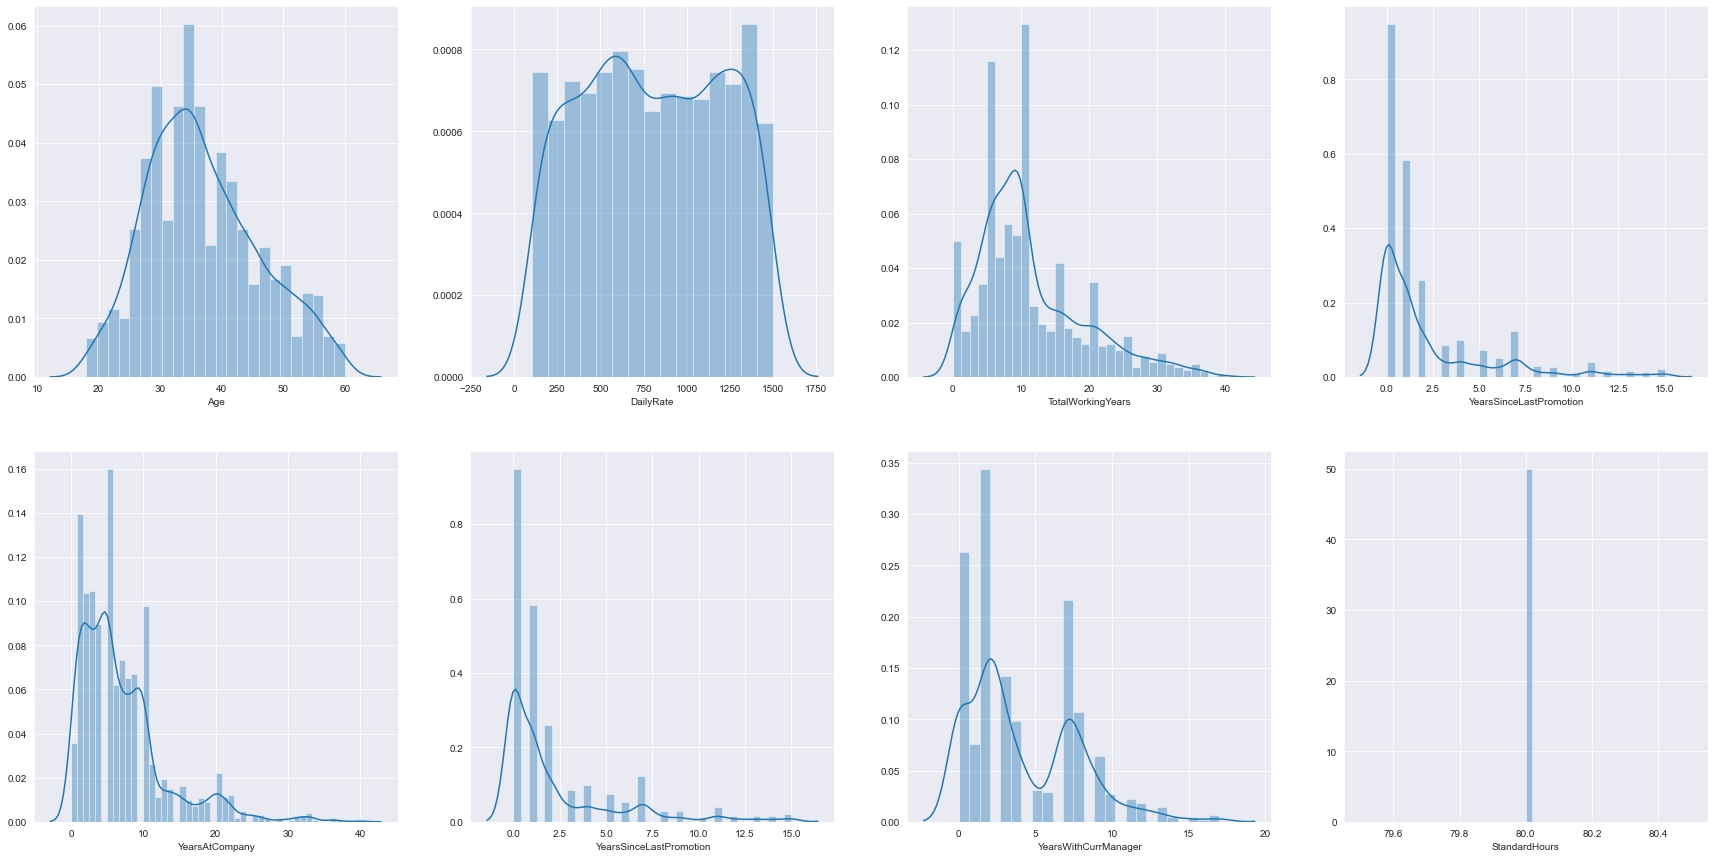

In [11]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,4,figsize=(30,15))
sns.distplot(df.Age,ax=axes[0,0]);
sns.distplot(df.DailyRate,ax=axes[0,1]);
sns.distplot(df.TotalWorkingYears,ax=axes[0,2]);
sns.distplot(df.YearsSinceLastPromotion,ax=axes[0,3]);
sns.distplot(df.YearsAtCompany,ax=axes[1,0]);
sns.distplot(df.YearsSinceLastPromotion,ax=axes[1,1]);
sns.distplot(df.YearsWithCurrManager,ax=axes[1,2]);
sns.distplot(df.StandardHours,ax=axes[1,3]);

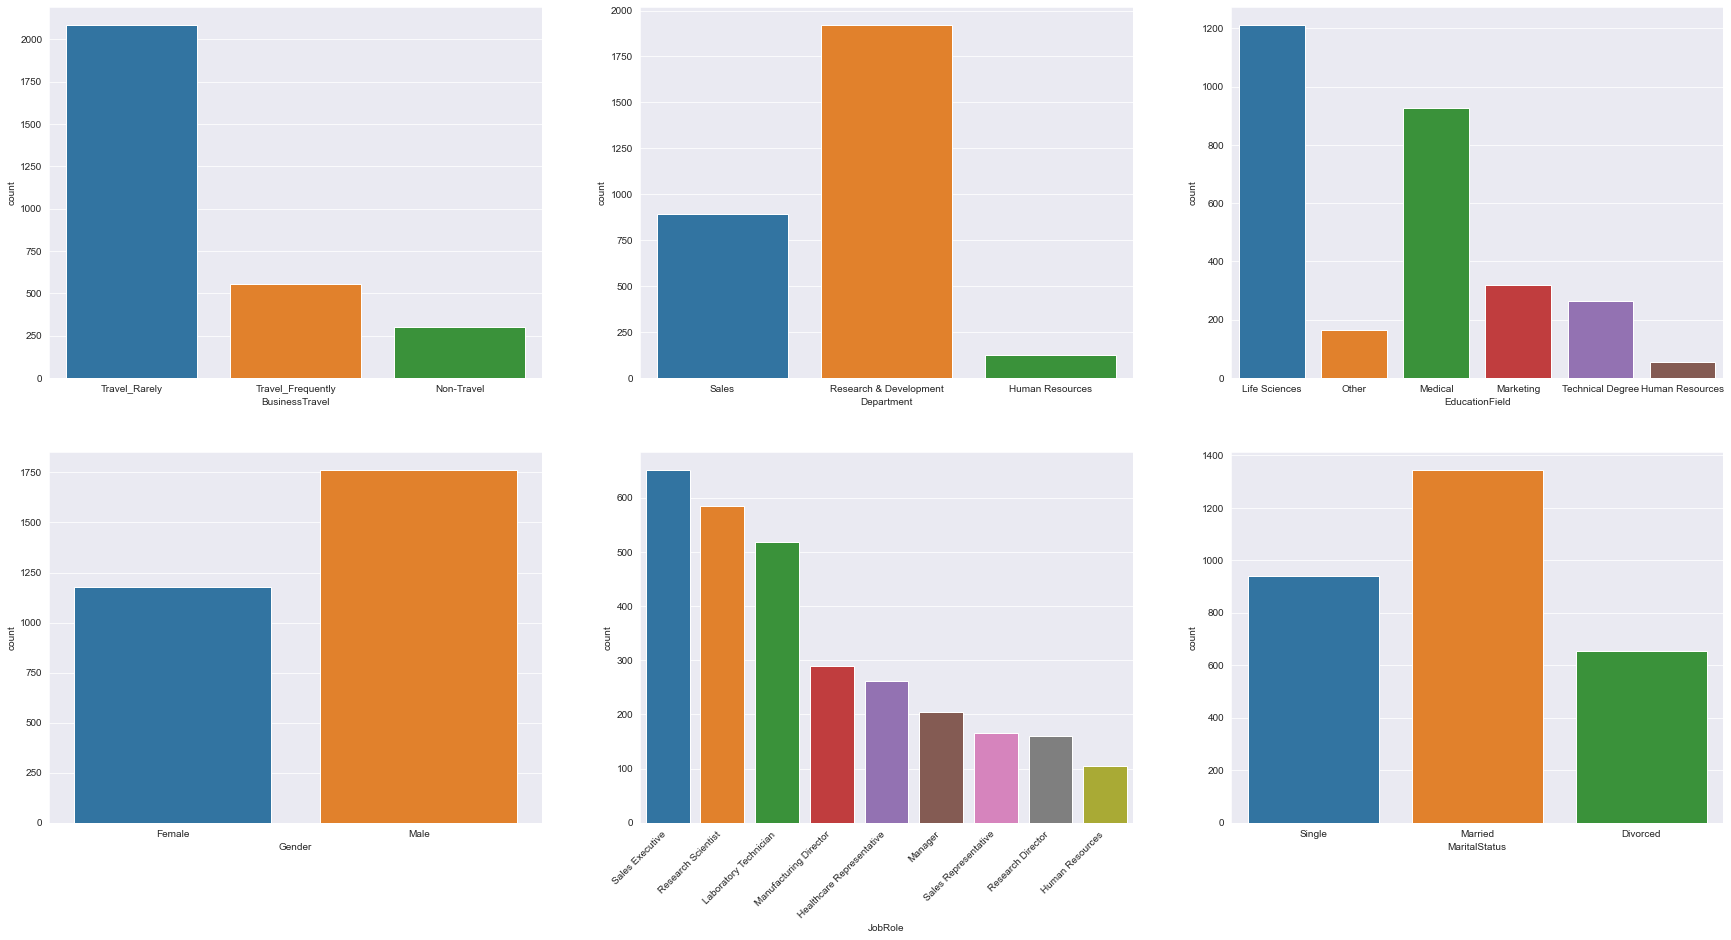

In [12]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,3,figsize=(30,15))
sns.countplot(df.BusinessTravel,ax=axes[0,0]);
sns.countplot(df.Department,ax=axes[0,1]);
sns.countplot(df.EducationField,ax=axes[0,2]);
sns.countplot(df.Gender,ax=axes[1,0]);
chart = sns.countplot(df.JobRole,ax=axes[1,1]);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.countplot(df.MaritalStatus,ax=axes[1,2]);

## Multivariate Analysis

<b>Monthly Income</b>:  people on higher wages are less likely to leave the company<br>
<b>Over Time</b>:  people who work overtime are more likely to leave the company<br>
<b>Age</b>:  Employees in relatively young age bracket less than 40 are more likely to leave<br>
<b>DistanceFromHome</b>:  Employees who live further from home are more likely to leave the company<br>
<b>TotalWorkingYears</b>: The more experienced employees are less likely to leave. Employees who have between 5–8 years of experience should be identified as potentially having a higher-risk of leaving<br>
<b>YearsAtCompany</b>:  Employees who are less than 5 years with company are in high risk of leaving


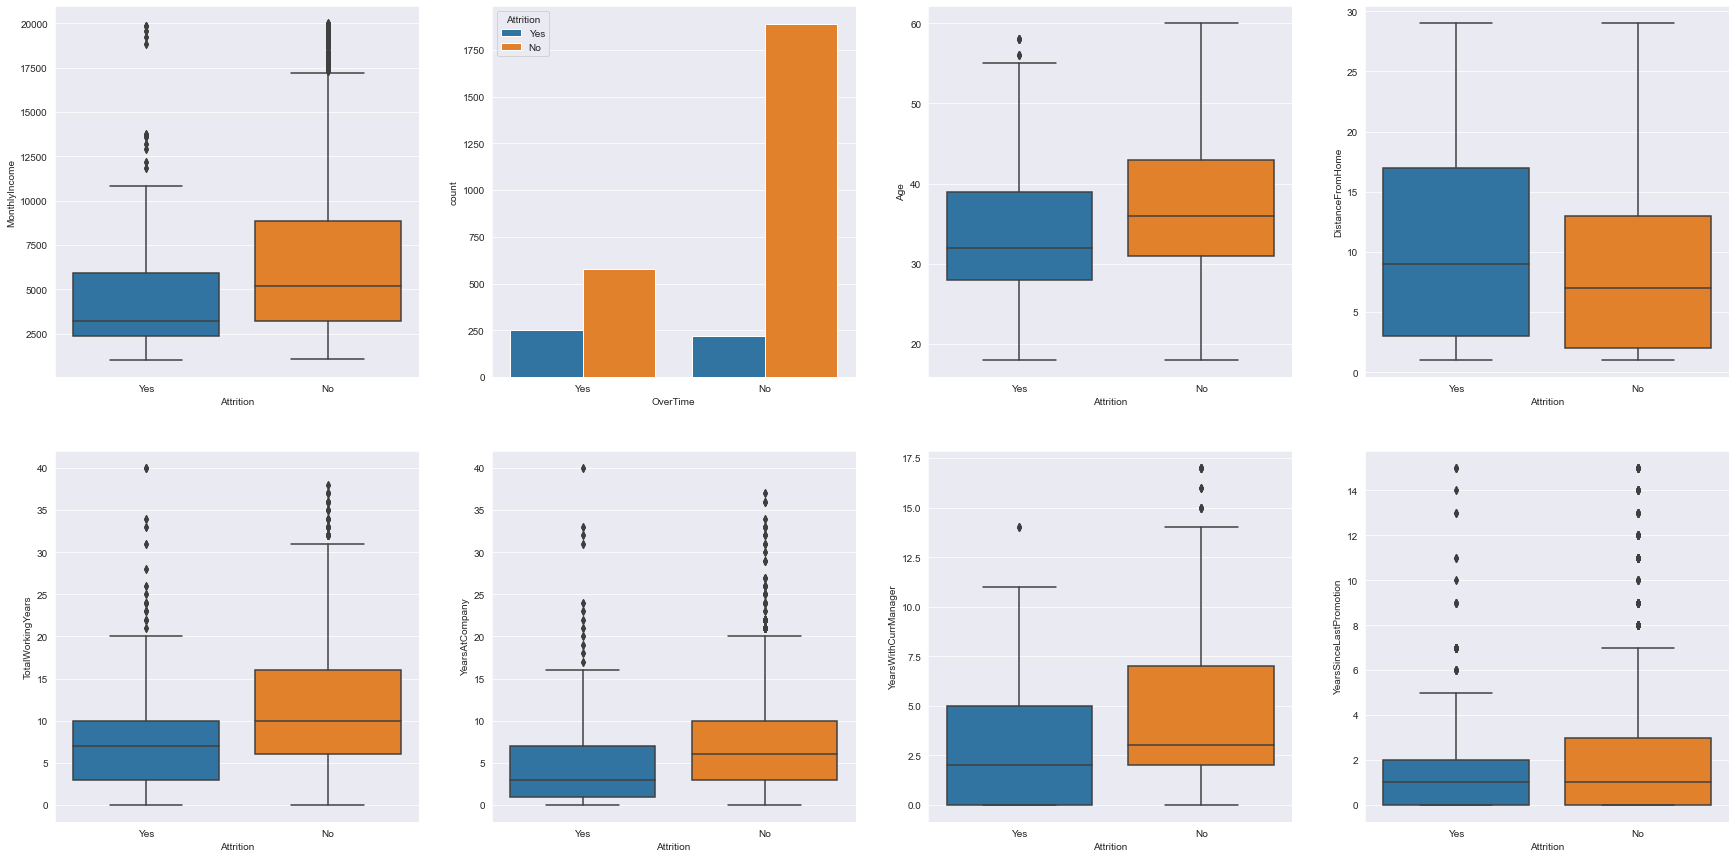

In [13]:
sns.set_style("darkgrid")
f, ax = plt.subplots(2,4,figsize=(30,15))
sns.boxplot(y='MonthlyIncome',x='Attrition',data=df,ax=ax[0][0])
sns.countplot(x='OverTime',hue='Attrition',data=df,ax=ax[0][1])
sns.boxplot(y='Age',x='Attrition',data=df,ax=ax[0][2])
sns.boxplot(y='DistanceFromHome',x='Attrition',data=df,ax=ax[0][3])
sns.boxplot(y='TotalWorkingYears',x='Attrition',data=df,ax=ax[1][0])
sns.boxplot(y='YearsAtCompany',x='Attrition',data=df,ax=ax[1][1])
sns.boxplot(y='YearsWithCurrManager',x='Attrition',data=df,ax=ax[1][2])
sns.boxplot(y='YearsSinceLastPromotion',x='Attrition',data=df,ax=ax[1][3])

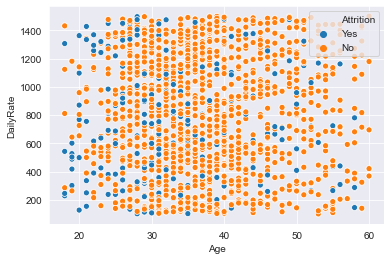

In [14]:
sns.scatterplot( x= "Age", y = "DailyRate" ,data=df, hue = 'Attrition')

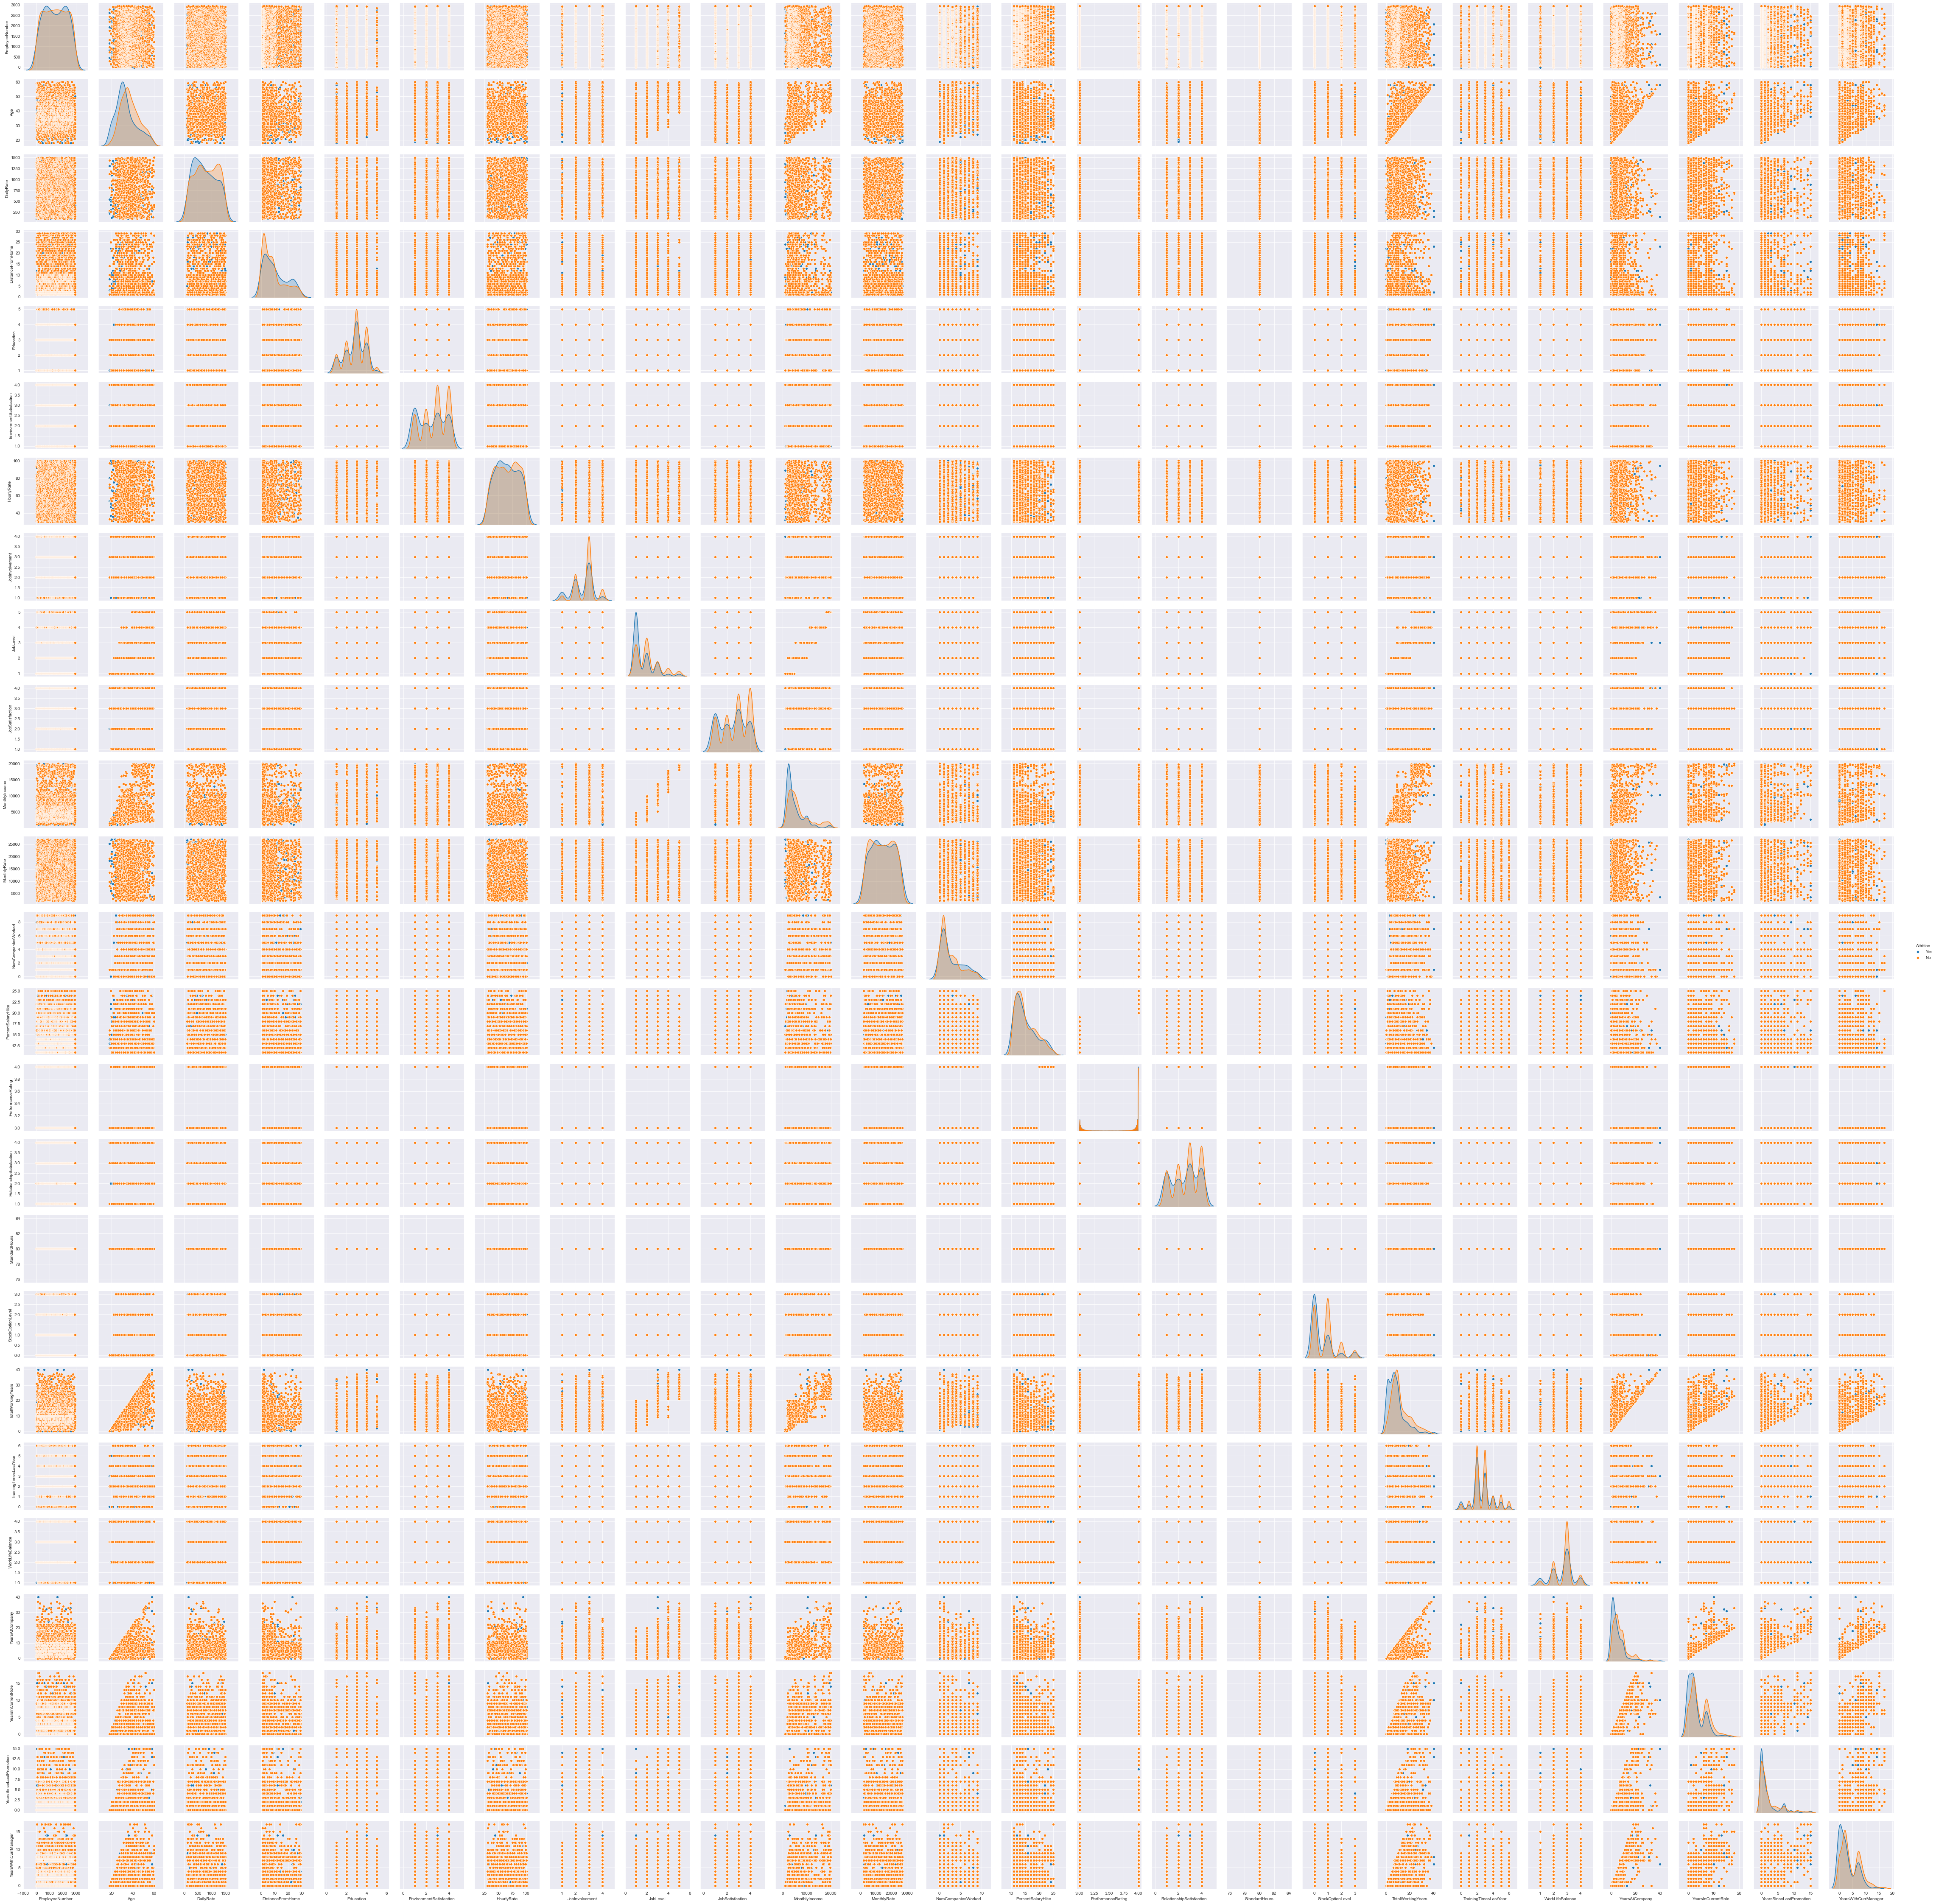

In [15]:
sns.pairplot(df, hue='Attrition');

## EmployeeNumber and Standard Hours can be dropped 

In [16]:
df.drop(columns = ['EmployeeNumber'],inplace=True)

In [17]:
df.drop(columns = ['StandardHours'],inplace=True)

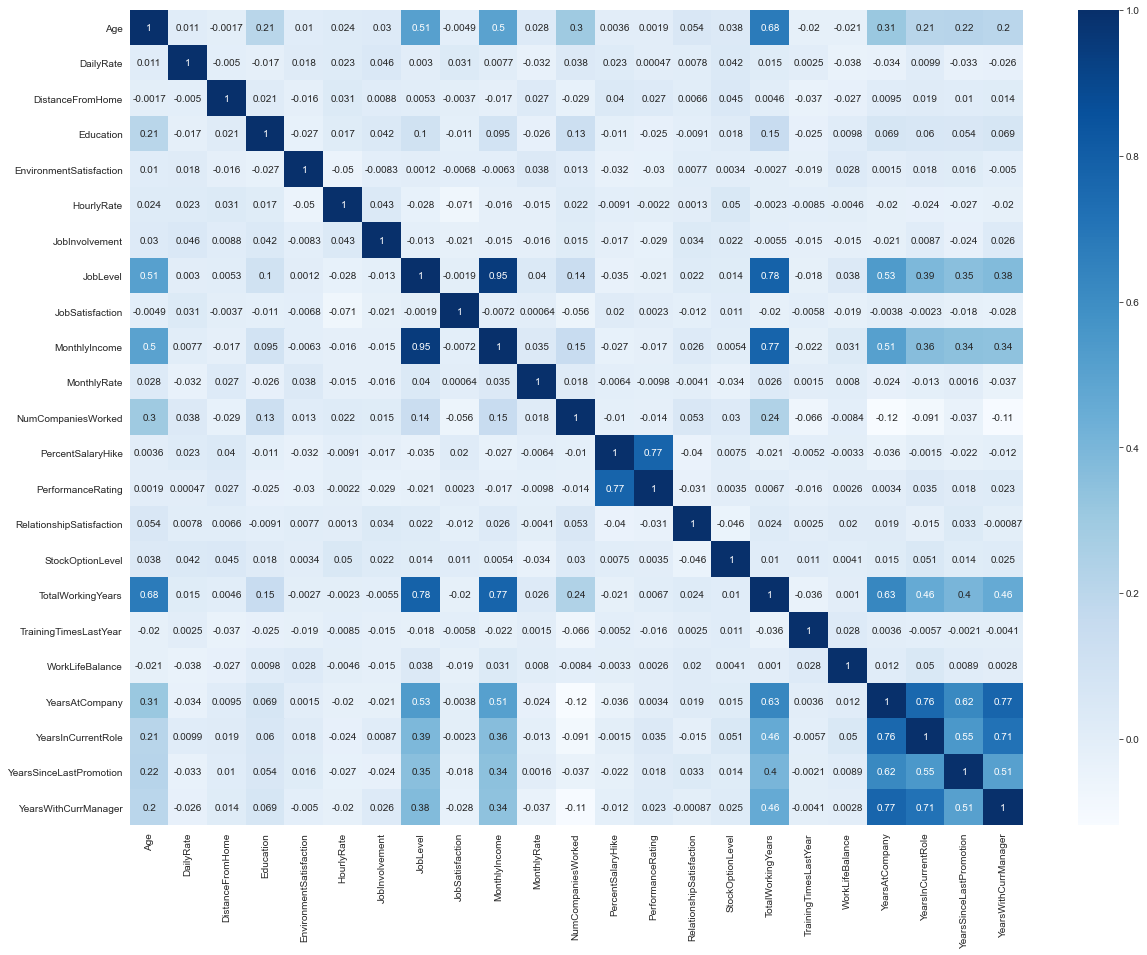

In [18]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot=True,cmap='Blues')


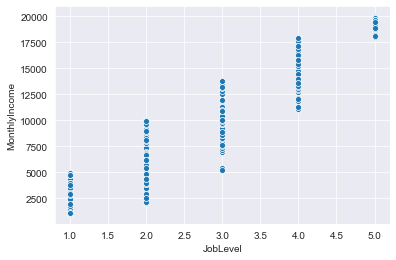

In [19]:
sns.scatterplot( x= "JobLevel", y = "MonthlyIncome",data=df)

### Dropping correlated column having correlation cofficient more than 0.7

In [20]:
# Create correlation matrix
def drop_corr(df):
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than 0.7
    to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

    # Drop features 
    df1 = df.drop(to_drop, axis=1)
    return df1

In [21]:
df = drop_corr(df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 27 columns):
Attrition                   2940 non-null object
Age                         2940 non-null int64
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyRate                 2940 non-null int64
NumCompaniesWorked          2940 non-null int64
Over18                

In [23]:
categorical_features = list(df.select_dtypes(include=['O']).columns)
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [24]:
## converting categorical feature to 'Category type'
for column in categorical_features:
    df[column] = df[column].astype('category')

In [25]:
# select the categorical columns
category_columns = df.select_dtypes(['category']).columns

In [26]:
# convert each columns to code
df[category_columns] = df[category_columns].apply(lambda x: x.cat.codes)

In [27]:
df.head()

Attrition  Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0          1   41               2       1102           2                 1   
1          0   49               1        279           1                 8   
2          1   37               2       1373           1                 2   
3          0   33               1       1392           1                 3   
4          0   27               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2               1                        2       0          94   
1          1               1                        3       1          61   
2          2               4                        4       1          92   
3          4               1                        4       0          56   
4          1               3                        1       1          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   
2               2         1        2                3              2   
3               3         1        6                3              1   
4               3         1        2                2              1   

   MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  \
0        19479                   8       0         1                 11   
1        24907                   1       0         0                 23   
2         2396                   6       0         1                 15   
3        23159                   1       0         1                 11   
4        16632                   9       0         0                 12   

   RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                         1                 0                      0   
1                         4                 1                      3   
2                         2                 0                      3   
3                         3                 0                      3   
4                         4                 1                      3   

   WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  
0                1               6                        0  
1                3              10                        1  
2                3               0                        0  
3                3               8                        3  
4                3               2                        2

In [28]:
y = df['Attrition']
X = df.drop(['Attrition'],axis=1)

In [29]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [30]:
cat_list = category_columns.to_list()
cat_list.remove('Attrition')


In [31]:
cat_list

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

### Splitting Data set b/w Train/Test

In [32]:
# numerical_columns = X.drop(cat_list,axis=1).columns.tolist()

# X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
from sklearn.model_selection import cross_val_score,KFold
k =  KFold(random_state=7,n_splits=5)

In [35]:
from sklearn.pipeline import Pipeline
model= []
tr = []
te = []
f1 = []
auc = []

##Model Building, as its classificatin problme we will be using below Classification Algorithms:
### Logistici Regression
### Decesion Tree
### Bagging Classifier
### AdaBoost
### Gradient Boost

In [36]:
from sklearn.metrics import f1_score, roc_auc_score

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)


model.append('Logistic Regression')
tr.append(pipeline.score(X_train,y_train))
te.append(cross_val_score(pipeline, X_test, y_test, cv=k).mean())
f1.append(f1_score(y_test,y_pred))
auc.append(roc_auc_score(y_test,y_pred))

In [38]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=7))
])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)


model.append('Decision Tree')
tr.append(pipeline.score(X_train,y_train))
te.append(cross_val_score(pipeline, X_test, y_test, cv=k).mean())
f1.append(f1_score(y_test,y_pred))
auc.append(roc_auc_score(y_test,y_pred))

In [39]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', RandomForestClassifier(random_state=7))
])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)


model.append('Random Forest')
tr.append(pipeline.score(X_train,y_train))
te.append(cross_val_score(pipeline, X_test, y_test, cv=k).mean())
f1.append(f1_score(y_test,y_pred))
auc.append(roc_auc_score(y_test,y_pred))

In [40]:
# Bagging
from sklearn.ensemble import BaggingClassifier
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', BaggingClassifier(random_state=7))
])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)


model.append('Bagging')
tr.append(pipeline.score(X_train,y_train))
te.append(cross_val_score(pipeline, X_test, y_test, cv=k).mean())
f1.append(f1_score(y_test,y_pred))
auc.append(roc_auc_score(y_test,y_pred))

In [41]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', AdaBoostClassifier(random_state=7))
])

pipeline.fit(X_train,y_train)


model.append('AdaBoost')
tr.append(pipeline.score(X_train,y_train))
te.append(cross_val_score(pipeline, X_test, y_test, cv=k).mean())
f1.append(f1_score(y_test,y_pred))
auc.append(roc_auc_score(y_test,y_pred))

In [42]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', GradientBoostingClassifier(random_state=7))
])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)


model.append('Gradient Boosting')
tr.append(pipeline.score(X_train,y_train))
te.append(cross_val_score(pipeline, X_test, y_test, cv=k).mean())
f1.append(f1_score(y_test,y_pred))
auc.append(roc_auc_score(y_test,y_pred))

In [43]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = tr
results['Testing Score'] = te
results['F1 Score'] = f1
results['ROC/AUC Score'] = auc
results = results.set_index('Model')
results.sort_values('Testing Score', ascending=False)

Training Score  Testing Score  F1 Score  ROC/AUC Score
Model                                                                      
Random Forest              1.000000       0.867434  0.912088       0.919192
Gradient Boosting          0.942602       0.865711  0.649007       0.744407
Logistic Regression        0.870748       0.862350  0.480000       0.666481
Bagging                    0.994473       0.852093  0.832370       0.861591
AdaBoost                   0.893707       0.848761  0.832370       0.861591
Decision Tree              1.000000       0.796002  0.861386       0.923034

### Scaling of data for random and grid search

In [44]:
ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test),columns=X_test.columns)



### Hyperparameter tunning using GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=7)

params = {
    'bootstrap': [True,False],
    'max_depth': [3,4,None],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,3, 4],
    'min_samples_split': [2,3,5],
    'n_estimators': [25,50,'warn']
}    

grid = GridSearchCV(estimator = rf, param_grid = params, cv = k)

grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fr...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, rand

In [46]:
model = ['Random forest after Grid search']
y_pred = grid.predict(X_test)
tr = [grid.score(X_train,y_train)]
te = [grid.score(X_test,y_test)]
f1 = [f1_score(y_test,y_pred)]
auc = [roc_auc_score(y_test,y_pred)]

In [47]:
gb = GradientBoostingClassifier(random_state=7)
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Hyperparameter tunning using RandomizedSearchCV

In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 25 numbers
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.1, 1, num = 10)]

# Create the random grid
params_r = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'learning_rate':learning_rate}

# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator=gb, param_distributions=params_r,cv = k, random_state=7)

# Fit the random search model
random.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_sam

In [49]:
random.best_params_

{'n_estimators': 108,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 7,
 'learning_rate': 0.6}

In [50]:
model.append('Gradient Boosting after RandomCV')
y_pred = random.predict(X_test)
tr.append(random.score(X_train,y_train))
te.append(random.score(X_test,y_test))
f1.append(f1_score(y_test,y_pred))
auc.append(roc_auc_score(y_test,y_pred))

In [51]:
model,tr,te,f1,auc

(['Random forest after Grid search', 'Gradient Boosting after RandomCV'],
 [1.0, 1.0],
 [0.9761904761904762, 0.9863945578231292],
 [0.9239130434782609, 0.9587628865979383],
 [0.9292929292929293, 0.9676519799219186])

### DataFrame to compare results.
* Gradient Boosting gives best Testing Score after Hyper parameter tuning 
* Both Random Forecast and GB is overfitting but Testing Accuracy is good so model is acceptable 

In [52]:


results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = tr
results['Testing Score'] = te
results['F1 Score'] = f1
results['ROC/AUC Score'] = auc
results = results.set_index('Model').sort_values('Testing Score',ascending=False)
results

Training Score  Testing Score  F1 Score  \
Model                                                                       
Gradient Boosting after RandomCV             1.0       0.986395  0.958763   
Random forest after Grid search              1.0       0.976190  0.923913   

                                  ROC/AUC Score  
Model                                            
Gradient Boosting after RandomCV       0.967652  
Random forest after Grid search        0.929293

## Using Pycaret for MachineLearning Models 

In [53]:
df2 = pd.read_excel('HR_Employee_Attrition Dataset.xlsx')

In [54]:
from pycaret.classification import *
exp1 = setup(df2, target = 'Attrition')

 
Setup Succesfully Completed!


In [55]:
compare_models()

In [56]:
randomForest = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9320  0.9459  0.5758  1.0000  0.7308  0.6951
1       0.9466  0.9543  0.6970  0.9583  0.8070  0.7769
2       0.9175  0.8939  0.5152  0.9444  0.6667  0.6242
3       0.9175  0.8960  0.5152  0.9444  0.6667  0.6242
4       0.9175  0.8587  0.5152  0.9444  0.6667  0.6242
5       0.9223  0.9522  0.5294  1.0000  0.6923  0.6526
6       0.9612  0.9754  0.7647  1.0000  0.8667  0.8444
7       0.9220  0.9565  0.5758  0.9048  0.7037  0.6613
8       0.9220  0.9285  0.5152  1.0000  0.6800  0.6407
9       0.9366  0.9169  0.6061  1.0000  0.7547  0.7208
Mean    0.9295  0.9278  0.5809  0.9696  0.7235  0.6864
SD      0.0140  0.0343  0.0824  0.0329  0.0644  0.0706

In [57]:
tuned_rf = tune_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9029  0.9453  0.3939  1.0000  0.5652  0.5219
1       0.8981  0.9702  0.3636  1.0000  0.5333  0.4897
2       0.8981  0.9574  0.4545  0.8333  0.5882  0.5357
3       0.9175  0.9399  0.4848  1.0000  0.6531  0.6125
4       0.9175  0.9096  0.4848  1.0000  0.6531  0.6125
5       0.9175  0.9805  0.5000  1.0000  0.6667  0.6255
6       0.9272  0.9614  0.5882  0.9524  0.7273  0.6879
7       0.8878  0.9641  0.3636  0.8571  0.5106  0.4587
8       0.9024  0.9299  0.4242  0.9333  0.5833  0.5367
9       0.9024  0.9121  0.4242  0.9333  0.5833  0.5367
Mean    0.9071  0.9470  0.4482  0.9510  0.6064  0.5618
SD      0.0115  0.0229  0.0659  0.0594  0.0634  0.0667

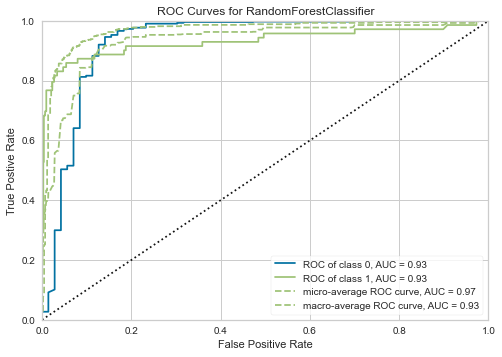

In [58]:
plot_model(tuned_rf, plot = 'auc')

In [59]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…